# Polynomial Regression - Lab

## Introduction

In this lab you'll practice your knowledge on adding polynomial terms to your regression model! 

## Objectives

You will be able to:

- Understand how to account for non-linear relationships between predictors and target variable using polynomial terms

## Create the best plot using polynomials!

Below, we created a plot with a clearly non-linear shape.

- plot a polynomial function using `PolynomialFeatures` for polynomials up until the second, third and fourth degree.
- print out the $R^2$ value for each of the three results. Draw conclusions with respect to which degree is best.

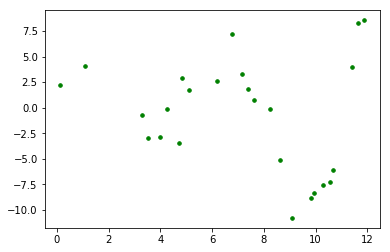

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

def pol(x):
    return x * np.cos(x)

x = np.linspace(0, 12, 100)
rng = np.random.RandomState(1234)
rng.shuffle(x)
x = np.sort(x[:25])
y = pol(x) + np.random.randn(25)*2

plt.scatter(x, y, color='green', s=50, marker='.')

plt.show();

## Solution

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [3]:
for n in range(2, 5):
    poly = PolynomialFeatures(degree=n)
    #X_fin = poly.fit_transform(x)
    print(poly)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)
PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)


## Summary

Great! You now know how to include polynomials in your linear model!